In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature
import glob

In [4]:
no2_files = glob.glob('/home/averstyn/final_s5p/*.nc')
co_files = glob.glob('/home/averstyn/final_s5p/co/*.nc')

In [5]:
no2 = xr.open_mfdataset(no2_files)
co = xr.open_mfdataset(co_files)

In [7]:
fire_no2 = no2.sel(time=slice('2020-08-10','2020-08-20'))
fire_co = co.sel(time=slice('2020-08-10','2020-08-20'))
fire_no2

<xarray.Dataset>
Dimensions:                              (time: 10, lat: 361, lon: 3601)
Coordinates:
  * time                                 (time) datetime64[ns] 2020-08-10 ......
  * lat                                  (lat) float64 -90.0 -89.5 ... 89.5 90.0
  * lon                                  (lon) float64 0.0 0.1 ... 359.9 360.0
Data variables:
    nitrogendioxide_tropospheric_column  (time, lat, lon) float32 dask.array<chunksize=(1, 361, 3601), meta=np.ndarray>

Text(0.5, 0.98, 'Carbon Monoxide Concentrations')

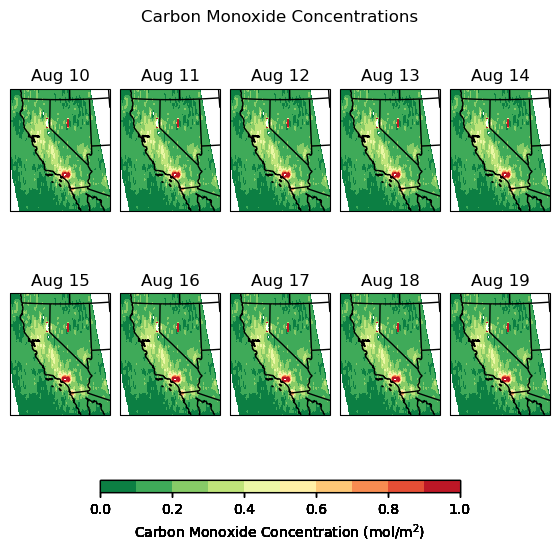

In [25]:
extent = [-125,-112,30,43]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
fig, axs = plt.subplots(nrows=2,ncols=5,
                        subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon,central_lat)},
                        figsize=(6,6))
axs = axs.flatten()
states = feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')

for i in range(10,20):
    da = fire_no2['nitrogendioxide_tropospheric_column'].sel(time=slice('2020-08-'+str(i)))
    da = da*10000
    clevs = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    cs=axs[i-10].contourf(da['lon'],da['lat'],da[0,:,:],
                          transform = ccrs.PlateCarree(),
                          cmap='RdYlGn_r',levels=clevs)
    axs[i-10].coastlines(zorder=100)
    axs[i-10].add_feature(feature.BORDERS)
    axs[i-10].add_feature(states)
    axs[i-10].set_extent(extent)
    axs[i-10].set_title('Aug '+str(i))
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.1)
    cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
    cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Carbon Monoxide Concentration (mol/m$^2$)')

fig.suptitle('Carbon Monoxide Concentrations')

In [10]:
fire_no2['nitrogendioxide_tropospheric_column'].sel(time=slice('2020-08-'+str(i)))

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (time: 1, lat: 361,
                                                         lon: 3601)>
dask.array<getitem, shape=(1, 361, 3601), dtype=float32, chunksize=(1, 361, 3601), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-08-10
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
Attributes:
    regrid_method:  bilinear